In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "-1"  # Set to 1 or the desired number of cores

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)  # Convert target to integer type
print(f"Shape of dataset: {X.shape}")


Shape of dataset: (70000, 784)


In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


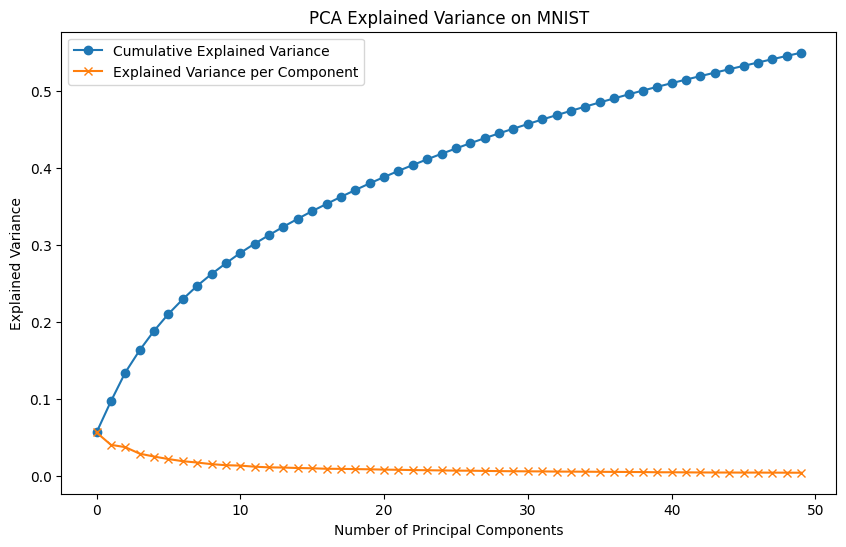

In [4]:
# Apply PCA to the dataset
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance and cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.plot(explained_variance, marker='x', label='Explained Variance per Component')
plt.title('PCA Explained Variance on MNIST')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()


In [5]:
# Apply PCA to retain 95% variance
pca_95 = PCA(n_components=0.95)  # Retain 95% of variance
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Shape of dataset after PCA (95% variance): {X_pca_95.shape}")


Shape of dataset after PCA (95% variance): (70000, 332)


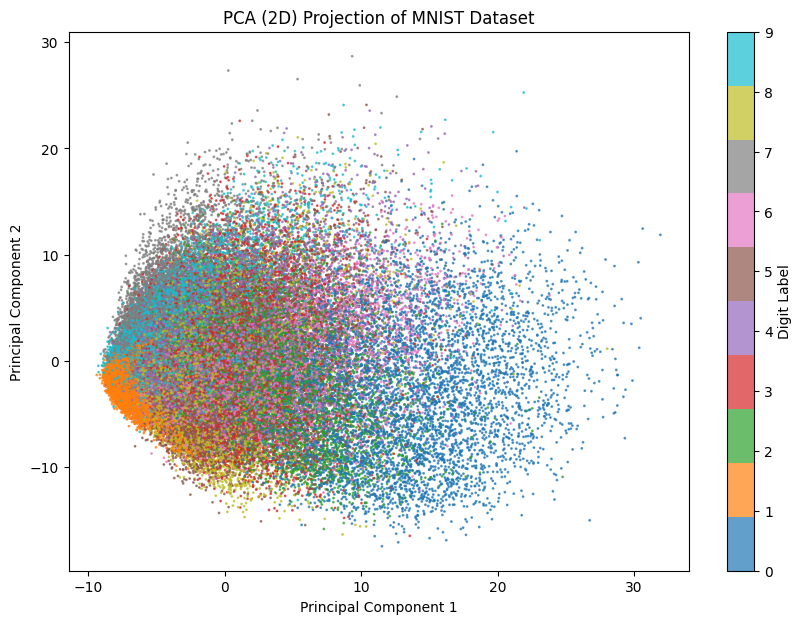

In [6]:
# Apply PCA to reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', s=1, alpha=0.7)
plt.title('PCA (2D) Projection of MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Digit Label')
plt.show()


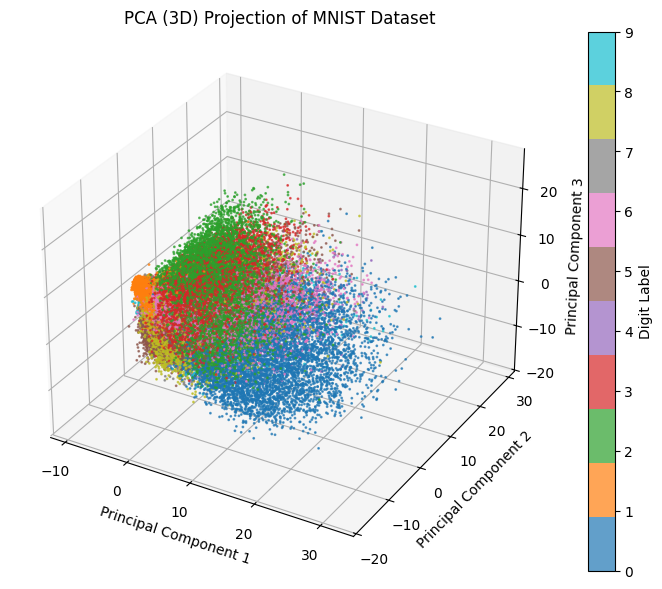

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce to 3 components for visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='tab10', s=1, alpha=0.7)
plt.title('PCA (3D) Projection of MNIST Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, label='Digit Label')
plt.show()
